# 연령별 취업자수 관계

- 국가통계포털에서 <mark>행정구역(시도)/성/연령별 취업자</mark> 데이터 다운로드
- 전처리하기
<hr>
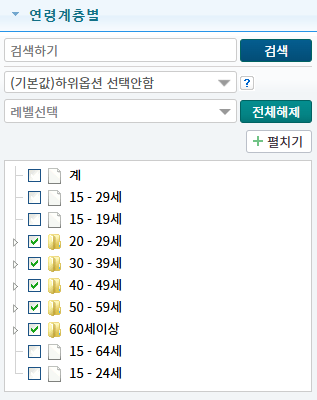

In [1]:
import pandas as pd
import matplotlib
import matplotlib as rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [ ]:
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
fontlist=fm.findSystemFonts(fontpaths=None, fontext='ttf')
fontlist

Text(0.3, 0.3, '한글')

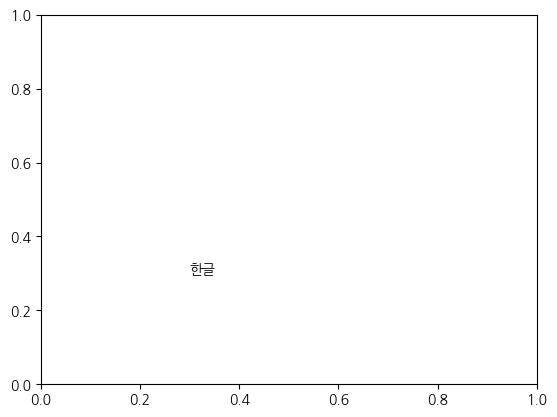

In [3]:
# 윈도우용 폰트 경로 설정
path="C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.3,0.3,'한글')

In [4]:
import pandas as pd
file_path = "./ref/행정구역시도성연령별취업자_20250304.csv"
ori = pd.read_csv(file_path,encoding="EUC-KR")
ori.head()

,시도별,시점,연령계층별,성별,데이터
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773


In [5]:
ex_data = ori.copy()
ex_data.columns = ['resion', 'year', 'age', 'gender', 'value']
# ex_data['value'] = pd.to_numeric(ex_data['value'], errors='coerce')  # 숫자로 변환, 오류 발생 시 NaN으로 처리
# ex_data['value'] = ex_data['value'].fillna(0)  # NaN 값을 0으로 채움
# ex_data['value'] = ex_data['value'].astype(int)  # 'value' 열을 정수형으로 변환
# result = ex_data.groupby('year')['value'].sum()  # 연도별로 'value' 값 합계 계산
# print(result)
ex_data.loc[ex_data['resion']=='세종특별자치시','value']=ex_data.loc[ex_data['resion']=='세종특별자치시']['value'].replace('-',0)
ex_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [6]:
ex_data['value'] = ex_data['value'].astype(int)  
ex1_data=ex_data.groupby('year')['value'].sum().reset_index(name='total')

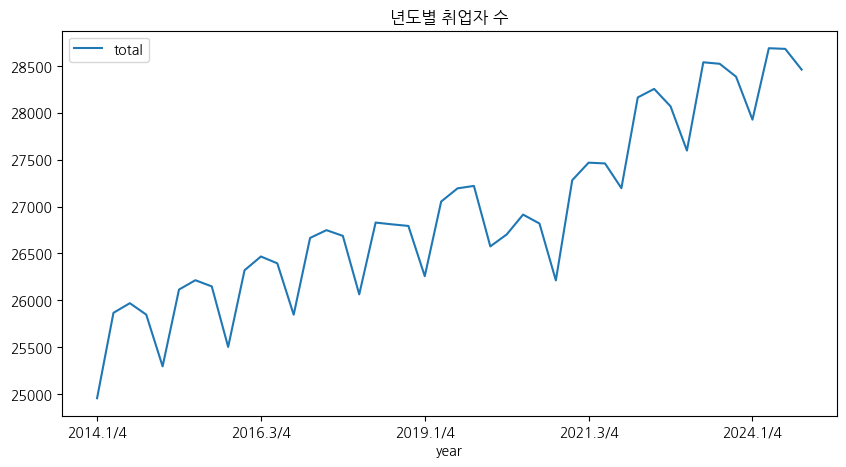

In [7]:
ex1_data.plot(x='year', y='total', figsize=(10,5), title="년도별 취업자 수")
plt.show()

In [8]:
ex2_data = ori.copy()
ex2_data.columns = ['resion', 'year', 'age', 'gender', 'value']
ex2_data.loc[ex_data['resion']=='세종특별자치시','value']=ex_data.loc[ex_data['resion']=='세종특별자치시']['value'].replace('-',0)
ex2_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [9]:
ex2_data['value']=ex2_data['value'].astype(int)  
gen = ex2_data.groupby(['year','gender'])['value'].sum().reset_index(name='total')
gen

,year,gender,total
0,2014.1/4,남자,14650
1,2014.1/4,여자,10305
2,2014.2/4,남자,15027
3,2014.2/4,여자,10839
4,2014.3/4,남자,15088
...,...,...,...
83,2024.2/4,여자,12716
84,2024.3/4,남자,15945
85,2024.3/4,여자,12737
86,2024.4/4,남자,15868


In [10]:
filter_m=gen['gender']=='남자'
filter_f=gen['gender']=='여자'
male=gen[filter_m]
female=gen[filter_f]

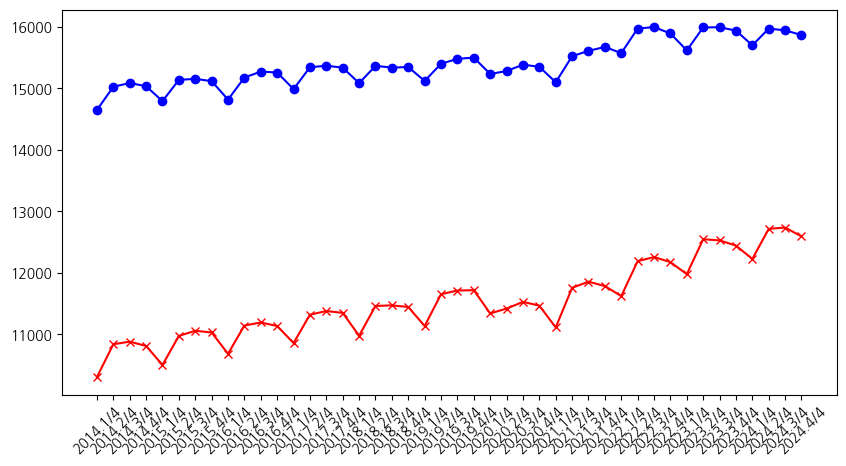

In [11]:
plt.figure(figsize=(10,5))
plt.plot(male['year'],male['total'], label='남자', color='blue',linestyle='-', marker='o')
plt.plot(female['year'],female['total'], label='여자', color='red',linestyle='-', marker='x')
plt.xticks(range(len(ex1_data)))
plt.xticks(ex1_data['year'],rotation=45)
plt.show()

In [12]:
ex3_data = ori.copy()
ex3_data.columns = ['resion', 'year', 'age', 'gender', 'value']
ex3_data.loc[ex_data['resion']=='세종특별자치시','value']=ex_data.loc[ex_data['resion']=='세종특별자치시']['value'].replace('-',0)
ex3_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [13]:
ex3_data['value']=ex3_data['value'].astype(int)  
Age = ex3_data.groupby(['year','age'])['value'].sum().reset_index(name='total')
Age

,year,age,total
0,2014.1/4,20 - 29세,3507
1,2014.1/4,30 - 39세,5773
2,2014.1/4,40 - 49세,6839
3,2014.1/4,50 - 59세,5793
4,2014.1/4,60세이상,3043
...,...,...,...
215,2024.4/4,20 - 29세,3532
216,2024.4/4,30 - 39세,5500
217,2024.4/4,40 - 49세,6162
218,2024.4/4,50 - 59세,6706


In [14]:
age2=Age['age']=='20 - 29세'
age3=Age['age']=='30 - 39세'
age4=Age['age']=='40 - 49세'
age5=Age['age']=='50 - 59세'
age6=Age['age']=='60세이상'

Age2=Age[age2]
Age3=Age[age3]
Age4=Age[age4]
Age5=Age[age5]
Age6=Age[age6]

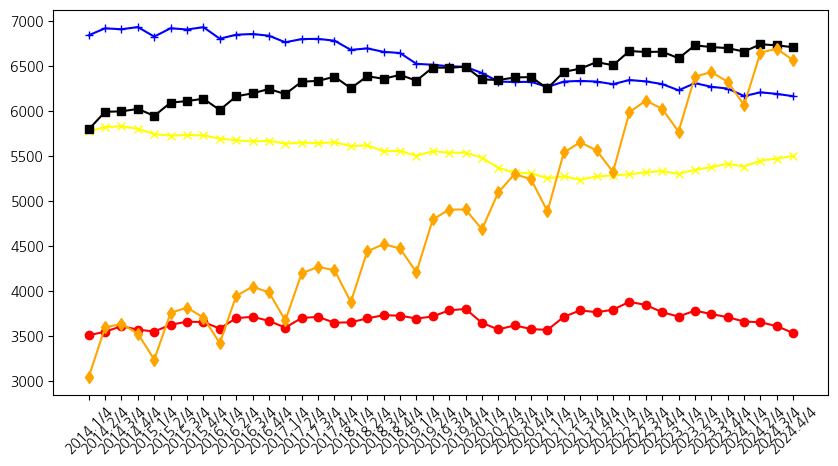

In [15]:
Age = Age.sort_values(by='year')  # 먼저 정렬
plt.figure(figsize=(10,5))
plt.plot(Age2['year'], Age2['total'], label='20 - 29세', color='red', linestyle='-', marker='o')
plt.plot(Age3['year'], Age3['total'], label='30 - 39세', color='yellow', linestyle='-', marker='x')
plt.plot(Age4['year'], Age4['total'], label='40 - 49세', color='blue', linestyle='-', marker='+')
plt.plot(Age5['year'], Age5['total'], label='50 - 59세', color='black', linestyle='-', marker='s')
plt.plot(Age6['year'], Age6['total'], label='60세이상', color='orange', linestyle='-', marker='d')
plt.xticks(range(len(ex1_data)))
plt.xticks(ex1_data['year'],rotation=45)
plt.show()

<h1>연령별 취업자 수 분석</h1>

<h4>15-29세 (청년층)</h4>
15-29세 연령대는 취업자수의 변화가 가장 큰 변동성을 보입니다. 최근 몇 년간 청년층의 취업자수는 경제 불안정, 비정규직의 증가, 학력 과잉 등으로 인해 어려움을 겪고 있으며, 그로 인해 청년 실업률이 높아지고 있습니다. 또한, 대학 졸업 후 취업 준비 기간이 길어지며 취업을 원하는 인구는 많지만, 취업 기회가 상대적으로 부족한 상황입니다.<br>청년층의 취업 시장 진입 장벽이 높아지고 있으며, 직업 교육 및 훈련, 인턴십 기회 확대 등이 필요합니다.
<h4>30-39세 (경력직층)</h4>
30대는 경력을 쌓고 가정과 직장 생활을 병행하는 연령대입니다. 이 연령대의 취업자수는 안정적인 상승세를 보였으나, 특히 여성의 경우 출산과 육아 문제로 인한 취업 공백이 커지는 경향이 있습니다. 또한, 경력단절 여성의 재취업률이 낮아지는 문제가 발생하고 있습니다.<br>경력직의 취업자 수는 비교적 안정적이나, 경력단절 여성의 취업을 위한 정책적 지원이 강화되어야 합니다.
<h4>40-49세 (중장년층)</h4>
40대는 직장에서의 중간 관리자로서 중요한 역할을 하고 있으며, 비교적 안정적인 취업 상태를 보입니다. 그러나 일부는 기술 변화와 직무 변화에 적응하기 어려운 경우가 많습니다. 특히, 고용 불안정성이 증가하면서 정년 연장과 관련된 논의가 활발히 이루어지고 있습니다.<br>중장년층의 재교육과 직무 전환을 위한 정책이 필요하며, 고령화 사회를 대비한 정년 연장 제도 등이 중요합니다.
<h4>50-59세 (고령층)</h4>
50대는 경제 활동을 계속 유지하는 비율이 증가하고 있지만, 일자리의 질이 낮아지는 경향이 있습니다. 이 연령대는 주로 비정규직 일자리나 단기 계약직으로 취업하는 경우가 많습니다. 고용의 질이 저조해져 생활 수준에 영향을 미칠 수 있습니다.<br>고령층의 재취업을 촉진하는 정책과 동시에, 고령층의 경제적 안정성을 위한 대책이 필요합니다.
<h4>60세 이상 (고령자층)</h4>
60세 이상 연령대의 취업자수는 점차 증가하는 추세입니다. 이는 고령화 사회의 특성상 늦은 나이에 일자리를 구하는 인구가 증가하고 있기 때문입니다. 하지만, 대체로 단기적이고 비정규직 일자리가 대부분을 차지합니다.<br>고령자 고용 촉진을 위한 지속적인 정책과 함께, 고령자의 노동 시장 참여가 장기적으로 지속 가능할 수 있는 방안 마련이 필요합니다.
<hr>
연령별 취업자수 변화는 노동 시장의 구조적 변화를 반영하고 있으며, 각 연령대의 특성에 맞춘 정책적 대응이 필요합니다. 특히, 청년층의 취업 기회 확대와 경력단절 여성, 고령층의 노동 시장 재진입을 위한 정책이 중요한 시점입니다. <br>
이를 통해 전체적인 고용 상황이 개선되고, 세대 간의 고용 격차를 줄여 나갈 수 있을 것입니다.

In [16]:
# ori 데이터프레임을 복사하여 ex4_data로 저장합니다.
ex4_data = ori.copy()
ex4_data.loc[:,'데이터'] = ex4_data.loc[:,'데이터'].replace("-",0).astype(int)
ex4_data['데이터']

0       331
1       460
2       774
3       519
4       773
       ... 
7435     44
7436     54
7437     47
7438     49
7439     49
Name: 데이터, Length: 7440, dtype: object

In [17]:
filter0 = (ex4_data['시점']>= "2018.1/4") & (ex4_data['시점'] < "2019.1/4")
ex4_data = ex4_data[filter0]
ex4_data.head()

,시도별,시점,연령계층별,성별,데이터
160,서울특별시,2018.1/4,20 - 29세,남자,339
161,서울특별시,2018.1/4,20 - 29세,여자,477
162,서울특별시,2018.1/4,30 - 39세,남자,693
163,서울특별시,2018.1/4,30 - 39세,여자,513
164,서울특별시,2018.1/4,40 - 49세,남자,719


In [18]:
x_data = ex4_data[ex4_data['연령계층별'].isin(['20 - 29세'])]
# x_data.loc[:,'데이터'] = x_data.loc[:,'데이터'].astype(int)
y_data = ex4_data[ex4_data['연령계층별'].isin(['60세이상'])]
# y_data.loc[:,'데이터'] = y_data.loc[:,'데이터'].astype(int)
z_data = ex4_data
# z_data.loc[:,'데이터'] = ex3_data.loc[:,'데이터'].astype(int)
x = x_data.groupby('시도별')['데이터'].sum()#.reset_index(name="total") # 20대 취업자
y = y_data.groupby('시도별')['데이터'].sum()#.reset_index(name="total") # 60대(정년퇴임) 취업
z = z_data.groupby('시도별')['데이터'].sum()#.reset_index(name="total") # 전체 취업자 수

In [19]:
import numpy as np
regions = list(x.index) # 라벨
color = [ np.random.rand(3,) for _ in range(len(regions))] # 랜덤색상 color

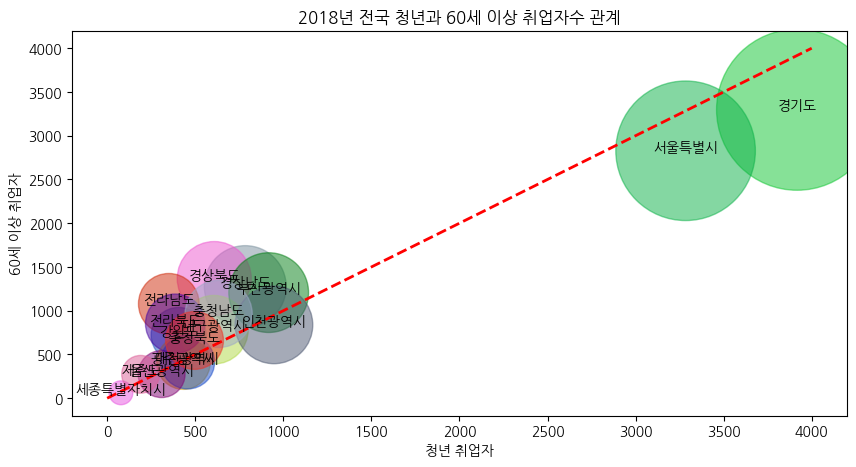

In [20]:
fig , ax = plt.subplots(figsize=(10,5))
z = np.array(z, dtype=float)
scatter = ax.scatter(x,y, s=z*0.5, c=color, alpha=0.5)

for n in range(len(regions)):
    ax.annotate(regions[n], xy=(x.iloc[n],y.iloc[n]), ha="center")

ax.plot([0,4000],[0,4000], color="r", linestyle="--", linewidth=2)

ax.set_title("2018년 전국 청년과 60세 이상 취업자수 관계")
ax.set_xlabel("청년 취업자")
ax.set_ylabel("60세 이상 취업자")
plt.show()

In [21]:
from prophet import Prophet

In [ ]:
# 페이스북에서는 time(year)을 ds , value는 y를 사용하므로 전처리 해준다.
ex4_data = ex1_data.copy()
ex4_data['year'] = pd.to_datetime(ex4_data['year'], format="%Y")
ex4_data = ex4_data.rename(columns={'year':'ds','total':'y'})
ex4_data.tail()